### Unsupervised ML Algorithm

Unsupervised learning is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision.

Unsupervised learning cannot be directly applied to a regression or classification problem because unlike supervised learning, we have the input data but *no corresponding output data.* **The goal of unsupervised learning is to find the underlying structure of dataset, group that data according to similarities, and represent that dataset in a compressed format.**

Below are some main reasons which describe the importance of Unsupervised Learning:

* Unsupervised learning is helpful for finding useful insights from the data.
* Unsupervised learning is much similar as a human learns to think by their own experiences, which makes it closer to the real AI.
* Unsupervised learning works on unlabeled and uncategorized data which make unsupervised learning very important.
* In real-world, we do not always have input data with the corresponding output so to solve such cases, we need unsupervised learning.

### K-Means Clustering Algorithm

K-Means Clustering is an unsupervised ML algorithm, which groups the unlabeled dataset into different clusters: K clusters.

Here K defines the number of pre-defined clusters that need to be created in the process, for example, if K=2, there will be two clusters, and for K=3, there will be three clusters...etc. 

It is an **iterative** algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The K-means clustering algorithm mainly performs two tasks:

* Determines the best value for K center points or centroids by an iterative process.
* Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

To clarify further, the K-means clustering algorithm does the following steps:
1. Specify the number of clusters (K)
2. Randomly initialize the cluster centers (centroids)
3. Assign each data point to the closest cluster center
4. Recompute the clusters' center as the mean of all data in that cluster
5. Repeat steps 3 & 4 until the cluster assignment stops changing or the maximum iteration is reached [iterative algorithm]


For a representation of the convergence of the K-Means algorithm: https://en.wikipedia.org/wiki/K-means_clustering#/media/File:K-means_convergence.gif

To practice the K-Means algorithm, we will use mall customer data, available on Kaggle. This dataset includes basic information for each customer, such as: ID, Gender, Age, Income, and Annual Spending Score.

Imagine if we want to cluster customers in order to give them relevant promotions or ADs.

Link to data: https://www.kaggle.com/datasets/shwetabh123/mall-customers

In [9]:
# Importing packages

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Loading dataset 

df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


It is always a good idea to explore the data using statistical and visual methods before implementing an algorithm. 

Here I will be using the matplotlib package, to understand the code and customize further, refer to the documentation: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

Text(0, 0.5, 'Spending Score (1-100)')

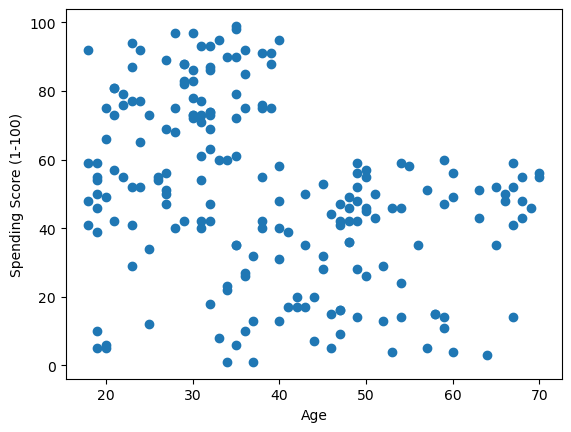

In [7]:
# Spending score & Age

plt.scatter(df['Age'], df['Spending Score (1-100)'])

plt.xlabel ("Age")
plt.ylabel ("Spending Score (1-100)")

I can see two groups.

Text(0, 0.5, 'Annual Income (k$)')

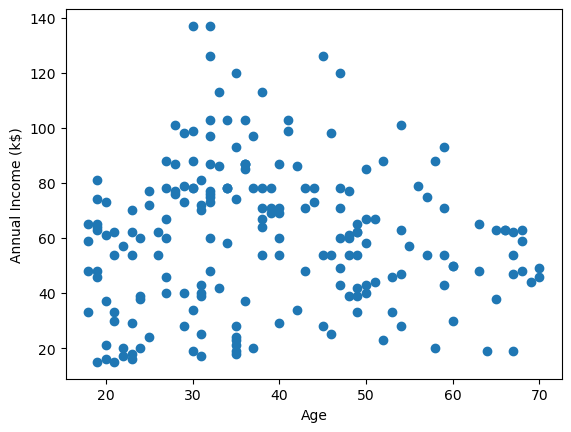

In [6]:
# Annual Income & Age

plt.scatter(df['Age'], df['Annual Income (k$)'])

plt.xlabel ("Age")
plt.ylabel ("Annual Income (k$)")

I cannot really see distinct groups.

Text(0, 0.5, 'Annual Income (k$)')

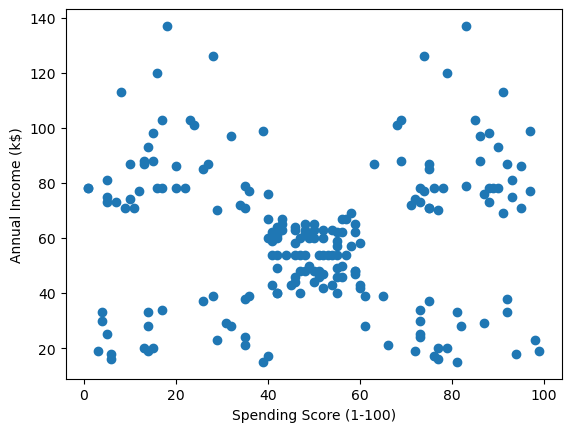

In [8]:
# Annual Income & Spending Score

plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])

plt.xlabel ("Spending Score (1-100)")
plt.ylabel ("Annual Income (k$)")

It seems like there are 5 groups?

Given the initial exploration, the K-Means algorithm will help us efficiently generate correct groups/clusters.

Before applying the K-Means algorithm, we need to do some data tranformation because K-Means is sensitive to the measurement units and scales; thus, it is better to standardize the data first to tackle this issue. 

We will use sci-kit's StandardScaler function, which basically substracts the mean of any feature from the actual values of that feature and divides by the feature’s standard deviation. 

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [10]:
# Transforming the data

customer_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()

scaler.fit(customer_df)  # to compute the mean and standard deviation of the features

scaled_df = scaler.transform(customer_df)

### A very vital choice is K, the number of clusters

A clustering model will not be relevant if we fail to identify the correct number of clusters to consider. [Note on 'correct']

There are multiple techniques for determining the number of clusters. We will use one of the most used ones to find the optimal number of clusters, the Elbow method, which is a heuristic method.

To use the Elbow method, we will create 2 functions:
1. The first function creates for each value of K the corresponding KMeans model and saves its inertia along with the actual K value.

*Note: Inertia measures how well a dataset was clustered by K-Means.*

*It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.*

**A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.**

2. The second function uses those inertias and K values to generate the final Elbow plot.

Documentation on sci-kit's KMeans function: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [13]:
# First function

def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [14]:
# Second function

def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\Users\noura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


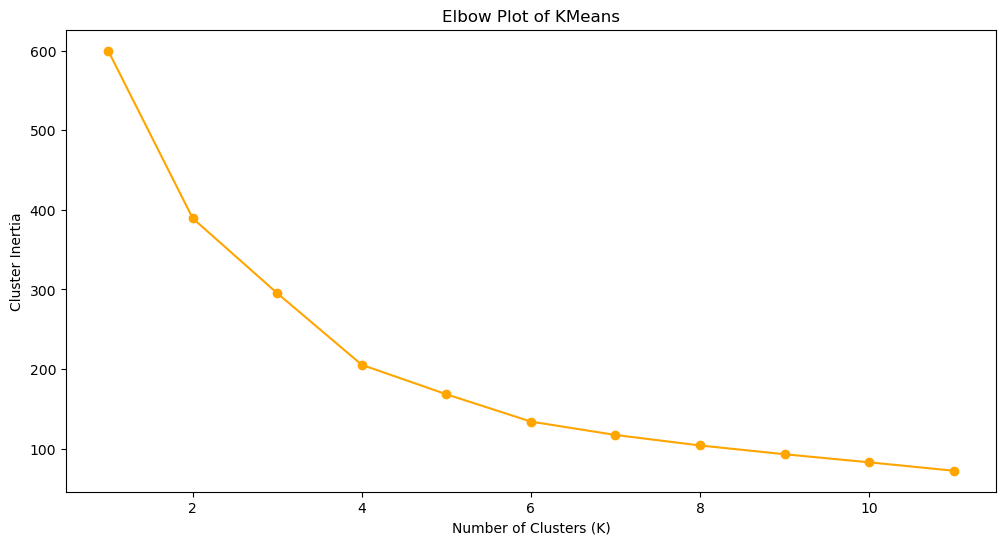

In [16]:
# Running the above functions with a maximum K of 12

clusters_centers, k_values = find_best_clusters(scaled_df, 12)

generate_elbow_plot(clusters_centers, k_values)

The cluster inertia decreases as we increase the number of clusters. 

Also the drop the inertia is minimal after K=5, thus 5 can be considered as the optimal number of clusters. It is also the shape of the elbow.

### Applying the final model

In [17]:
# Applying the model

kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_df)

KMeans(n_clusters=5)

We can access the cluster to which each data point belongs by using the .labels_ attribute. Let’s create a new column corresponding to those values.

In [18]:
customer_df['Cluster'] = kmeans_model.labels_

customer_df.head()

C:\Users\noura\AppData\Local\Temp\ipykernel_4376\2414657960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['Cluster'] = kmeans_model.labels_


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,0


Text(0, 0.5, 'Annual Income (k$)')

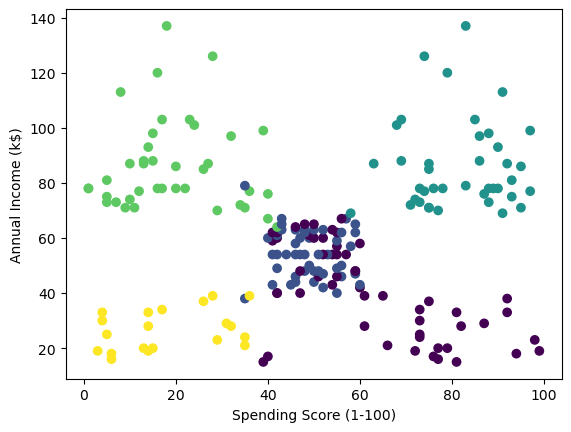

In [22]:
# Visualizing the clusters

plt.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"], 
            c = customer_df["Cluster"])

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

The KMeans clustering seems to generate a pretty good result, and the five clusters are well separated from each other, despite there being an overlap between the purple and the blue clusters.

To summarize findings:

* Customers on the top left (green) have a low spending score and a high annual income. 
    * A good marketing strategy could be implemented to target those customers so that they can spend more.
    
* Customers on the bottom left (yellow) have a low annual income and also spends less.
    * which makes sense, because they are trying to adjust their spending habit to their budget.

* The top right (dark green) customers are similar to the bottom left/acting consistently, the difference is that they have enough budget to spend.

* The bottom right/purple group of customers spends beyond their budget.

* The blue group represent the 50/100 spending score group.